<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [46]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [65]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
#URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
#URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [66]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset_car_sales.csv")
#await download(path, "dataset.csv")

---


# Test Environment


In [67]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts

df = pd.read_csv('dataset_car_sales.csv')
#df = pd.read_csv('dataset.csv')

df.head()
# Display the data frame
#print(df)

<h1>GenAI for Data Preparation </h1>

In [68]:
# Assuming 'df' is the Pandas data frame you want to check for missing values
# This code will return a list of columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Display the columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
[]


In [ ]:
# Assuming you already have a Pandas data frame named 'df'

# Replace missing values in the 'Screen_Size_cm' column with the most frequent value
most_frequent_value = df['Screen_Size_cm'].mode()[0]
df['Screen_Size_cm'].fillna(most_frequent_value, inplace=True)

# Replace missing values in the 'Weight_kg' column with the mean value
mean_value = df['Weight_kg'].mean()
df['Weight_kg'].fillna(mean_value, inplace=True)

# Additional details:
# - The `.mode()` method is used to calculate the most frequent value in a column.
# - The `[0]` indexing is used to retrieve the most frequent value from the resulting Series.
# - The `.fillna()` method is used to replace missing values with a specified value.
# - The `inplace=True` parameter is used to modify the original data frame instead of creating a new one.

# You can now use the modified 'df' data frame, which has the missing values replaced according to the guidelines.

In [ ]:
# Change the data type of 'Screen_Size_cm' to float
df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)

# Change the data type of 'Weight_kg' to float
df['Weight_kg'] = df['Weight_kg'].astype(float)

# Additional details:
# - The `.astype()` method is used to change the data type of a column.
# - In this case, we're specifying `float` as the desired data type.
# - Make sure the columns contain numeric values that can be converted to float.
# - If there are any non-numeric values in the columns, the conversion will raise an error.
# You can now use the modified 'df' data frame, which has the data types of 'Screen_Size_cm' and 'Weight_kg' changed to float.

# Display the data frame with the updated data types
print(df.dtypes)

In [ ]:
# Convert 'Screen_Size_cm' from centimeters to inches and modify the attribute name
df['Screen_Size_inch'] = df['Screen_Size_cm'] * 0.393701
df.drop('Screen_Size_cm', axis=1, inplace=True)

# Convert 'Weight_kg' from kilograms to pounds and modify the attribute name
df['Weight_pounds'] = df['Weight_kg'] * 2.20462
df.drop('Weight_kg', axis=1, inplace=True)

# Additional details:
# - The code multiplies the values under 'Screen_Size_cm' by 0.393701 to convert centimeters to inches.
# - The resulting values are stored in a new attribute named 'Screen_Size_inch'.
# - The original 'Screen_Size_cm' attribute is dropped from the data frame using the `.drop()` method.
# - Similarly, the code multiplies the values under 'Weight_kg' by 2.20462 to convert kilograms to pounds.
# - The resulting values are stored in a new attribute named 'Weight_pounds'.
# - The original 'Weight_kg' attribute is dropped from the data frame.

# You can now use the modified 'df' data frame, which has the contents and attribute names modified as required.

In [ ]:
# Find the maximum value in the 'CPU_frequency' column
max_cpu_frequency = df['CPU_frequency'].max()

# Normalize the 'CPU_frequency' values by dividing each value by the maximum value
df['CPU_frequency'] = df['CPU_frequency'] / max_cpu_frequency

# Additional details:
# - The code calculates the maximum value of the 'CPU_frequency' attribute using the `.max()` method.
# - It then divides the values under 'CPU_frequency' by the maximum value to normalize them.
# - The resulting normalized values overwrite the original values in the 'CPU_frequency' attribute.
# You can now use the modified 'df' data frame, which has the content under the 'CPU_frequency' attribute normalized.

# Display the data frame with the normalized 'CPU_frequency' values
print(df)

In [ ]:
# Convert the 'Screen' attribute into indicator variables
df1 = pd.get_dummies(df['Screen'], prefix='Screen')

# Append df1 into the original data frame df
df = pd.concat([df, df1], axis=1)

# Drop the original 'Screen' attribute from the data frame
df.drop('Screen', axis=1, inplace=True)

# Additional details:
# - The `pd.get_dummies()` function is used to convert a categorical attribute into indicator variables.
# - The resulting indicator variables are stored in a new data frame named 'df1'.
# - The `prefix` parameter is used to specify the naming convention for the indicator variables.
# - The `pd.concat()` function is used to concatenate the original data frame 'df' and 'df1' along the column axis (axis=1).
# - The resulting concatenated data frame is assigned back to 'df'.
# - Finally, the `.drop()` method is used to drop the original 'Screen' attribute from 'df'.

# You can now use the modified 'df' data frame, which has the 'Screen' attribute converted into indicator variables, appended, and the original attribute dropped.

In [ ]:
# Conversion rate from USD to Euros
conversion_rate = 0.85

# Convert the values under the 'Price' attribute from USD to Euros
df['Price'] = df['Price'] * conversion_rate

# Display the data frame with the updated 'Price' values in Euros
print(df)
```

# This code snippet multiplies the values under the 'Price' attribute by the conversion rate from USD to Euros to convert them
# into Euros. The original 'Price' attribute in the data frame 'df' is updated with the values in Euros. You can adjust the 
# conversion rate based on the current exchange rate.

In [ ]:
# Perform min-max normalization on the 'CPU_frequency' values
df['CPU_frequency'] = (df['CPU_frequency'] - df['CPU_frequency'].min()) / 
                        (df['CPU_frequency'].max() - df['CPU_frequency'].min())

# Display the data frame with the normalized 'CPU_frequency' values
print(df)
```

# This code snippet uses min-max normalization to scale the 'CPU_frequency' values between 0 and 1 based on the minimum and 
# maximum values in the column. The original 'CPU_frequency' column in the data frame `df` is updated with the normalized 
# values. You can adjust the normalization method based on your specific requirements.

In [7]:
# Module2 LAB- GenAI for Data Insights
#=====================================================
# Generate the statistical description of all the features
description = df.describe(include='all')
print(description)

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

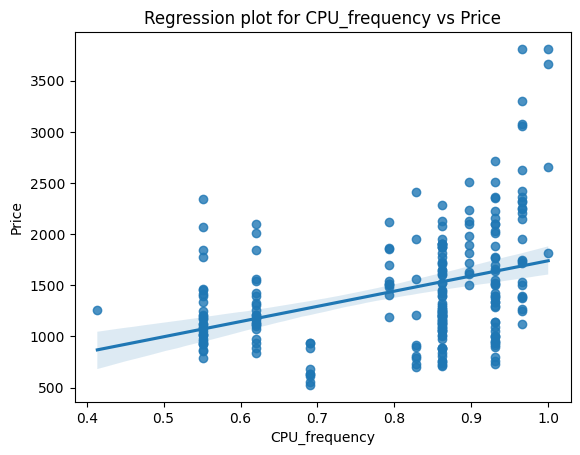

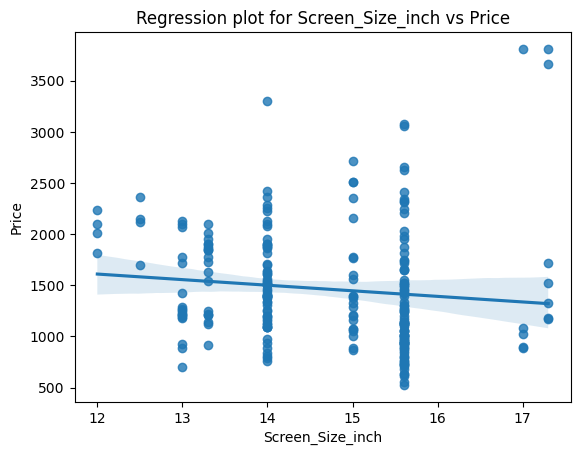

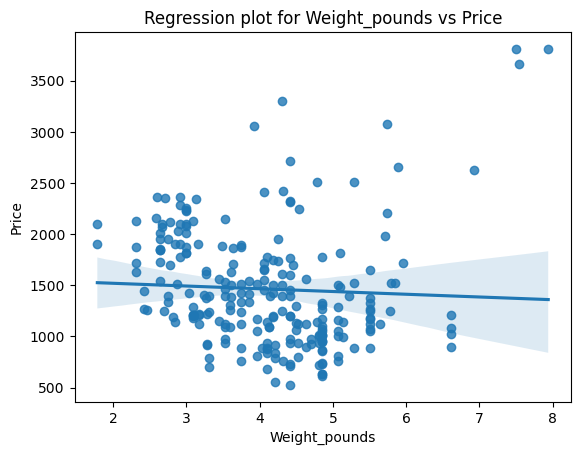

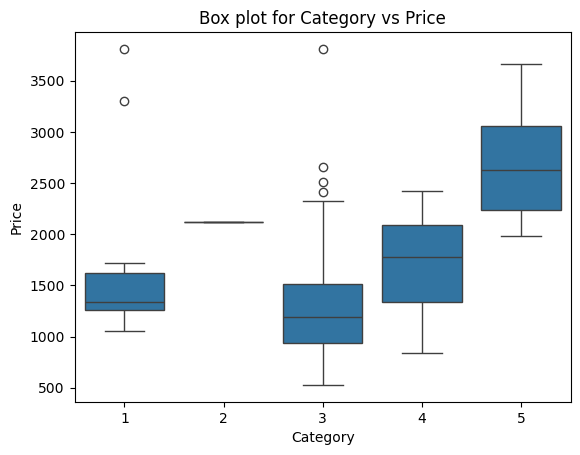

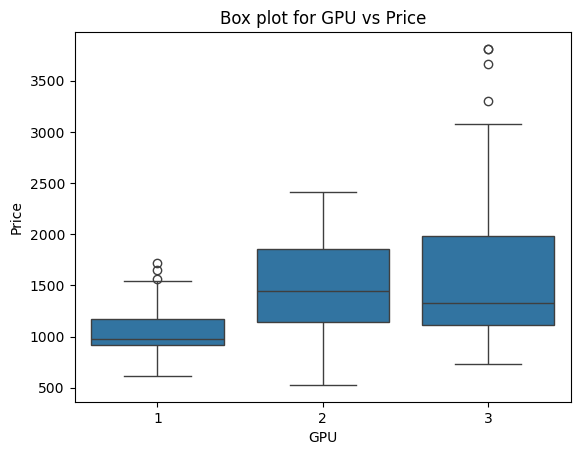

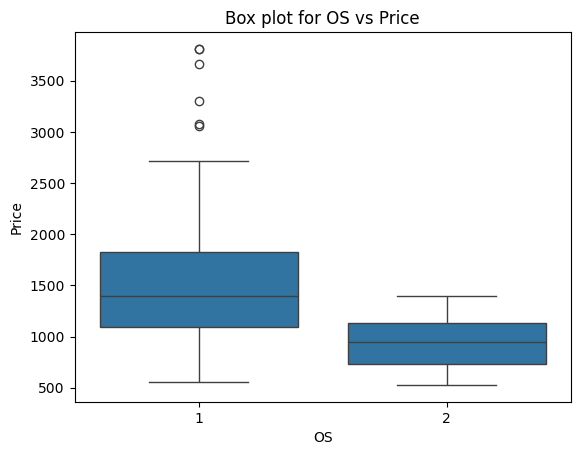

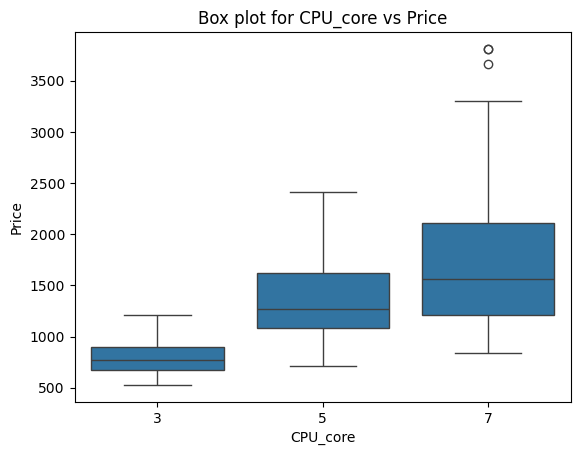

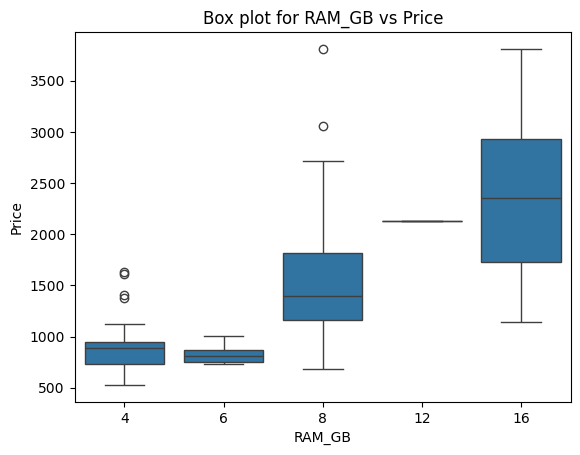

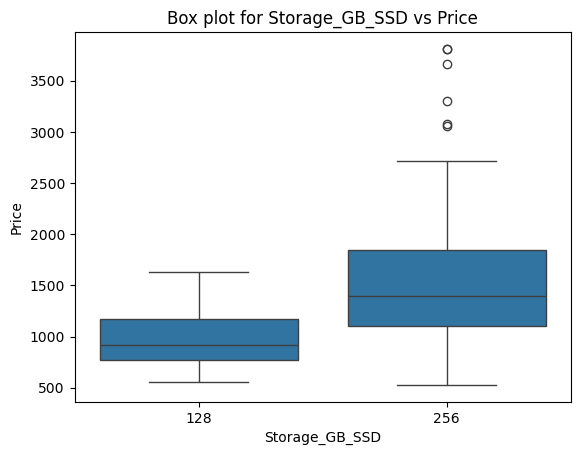

In [9]:
# 1. Create regression plots
regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=df)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()
# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=df)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

In [12]:
# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)
# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')
# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []
for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)
# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})
# Print the results
print(results_df)

                         Attribute  Correlation Value  Pearson Coefficient  \
Unnamed: 0.1          Unnamed: 0.1           0.321933             0.321933   
Unnamed: 0              Unnamed: 0           0.321933             0.321933   
Category                  Category           0.286243             0.286243   
GPU                            GPU           0.288298             0.288298   
OS                              OS          -0.221730            -0.221730   
CPU_core                  CPU_core           0.459398             0.459398   
Screen_Size_inch  Screen_Size_inch          -0.110644            -0.110644   
CPU_frequency        CPU_frequency           0.366666             0.366666   
RAM_GB                      RAM_GB           0.549297             0.549297   
Storage_GB_SSD      Storage_GB_SSD           0.243421             0.243421   
Weight_pounds        Weight_pounds          -0.050312            -0.050312   
Screen-Full_HD      Screen-Full_HD          -0.021075           

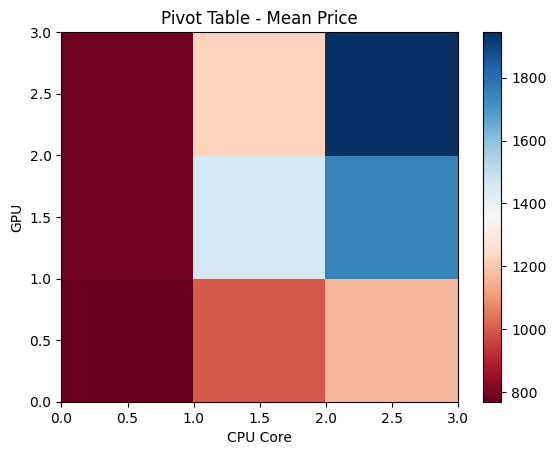

In [13]:
# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()
# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')
# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()

<h1>Module2 Lab: Generative AI for Models Development</h1>

In [69]:
# Module2 Lab: Generative AI for Models Development
#=====================================================
# Extract the source variable and target variable from the data frame
X = df[['CPU_frequency']]
y = df['Price']
# Initialize a linear regression model
model = LinearRegression()
# Train the model using the source and target variables
model.fit(X, y)
# Make predictions using the trained model
y_pred = model.predict(X)
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)
# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 284583.44058686297
Coefficient of Determination (R^2): 0.13444363210243238


In [7]:
# Extract the source variables and target variable from the data frame
X = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
y = df['Price']
# Initialize a linear regression model
model = LinearRegression()
# Train the model using the source and target variables
model.fit(X, y)
# Make predictions using the trained model
y_pred = model.predict(X)
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)
# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 161680.57263893107
Coefficient of Determination (R^2): 0.5082509055187374


In [8]:
# Extract the source variable and target variable from the data frame
X = df[['CPU_frequency']]
y = df['Price']
# Initialize lists to store the MSE and R^2 values for each model
mse_values = []
r2_values = []
# Loop through the polynomial orders
for order in [2, 3, 5]:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=order)
    X_poly = polynomial_features.fit_transform(X)
    # Initialize a linear regression model
    model = LinearRegression()
    # Train the model using the polynomial features and target variable
    model.fit(X_poly, y)
    # Make predictions using the trained model
    y_pred = model.predict(X_poly)
    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y, y_pred)
    # Calculate the coefficient of determination (R^2)
    r2 = r2_score(y, y_pred)
    # Append the MSE and R^2 values to the lists
    mse_values.append(mse)
    r2_values.append(r2)
    # Display the MSE and R^2 values for the current model
    print(f"Polynomial Order {order}:")
    print("Mean Squared Error (MSE):", mse)
    print("Coefficient of Determination (R^2):", r2)
    print()
# Compare the performance of the models
best_order = np.argmin(mse_values)
worst_order = np.argmax(r2_values)
print("Model Comparison:")
print(f"Best Polynomial Order: {best_order + 2}")
print(f"Worst Polynomial Order: {worst_order + 2}")


Polynomial Order 2:
Mean Squared Error (MSE): 249022.66596751186
Coefficient of Determination (R^2): 0.2426012074542374

Polynomial Order 3:
Mean Squared Error (MSE): 241024.863038488
Coefficient of Determination (R^2): 0.2669264079653102

Polynomial Order 5:
Mean Squared Error (MSE): 229137.29548054413
Coefficient of Determination (R^2): 0.30308227064436244

Model Comparison:
Best Polynomial Order: 4
Worst Polynomial Order: 4


In [9]:
# Extract the source variables and target variable from the data frame
X = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
y = df['Price']
# Create a pipeline that performs parameter scaling, polynomial feature generation, and linear regression
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)
# Train the model using the source and target variables
pipeline.fit(X, y)
# Make predictions using the trained model
y_pred = pipeline.predict(X)
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)
# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 120934.2421875
Coefficient of Determination (R^2): 0.6321802730109751


In [18]:
# Extract the source variables and target variable from the data frame
X = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
y = df['Price']
# Initialize lists to store the MSE and R^2 values for each model
mse_values = []
r2_values = []
# Loop through the polynomial orders
for order in [2, 3, 4]:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=order)
    # Transform the source variables into polynomial features
    X_poly = polynomial_features.fit_transform(X)
    # Define the hyperparameter values for the grid search
    param_grid = {'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}
    # Initialize a ridge regression model
    model = Ridge()
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=4)
    # Train the model using the polynomial features and target variable
    grid_search.fit(X_poly, y)
    # Make predictions using the trained model
    y_pred = grid_search.predict(X_poly)
    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y, y_pred)
    # Calculate the coefficient of determination (R^2)
    r2 = r2_score(y, y_pred)
    # Append the MSE and R^2 values to the lists
    mse_values.append(mse)
    r2_values.append(r2)
    # Display the MSE and R^2 values for the current model
    print(f"Polynomial Order {order}:")
    # Display the MSE and R^2 values
    print("Mean Squared Error (MSE):", mse)
    print("Coefficient of Determination (R^2):", r2)
    print("Best Model :",grid_search.best_estimator_)
    print("Accuracy :",grid_search.best_score_)
    


Polynomial Order 2:
Mean Squared Error (MSE): 128987.04078699532
Coefficient of Determination (R^2): 0.6076878039733669
Best Model : Ridge(alpha=10)
Accuracy : 0.271822631874025


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.30202e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.03229e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.79653e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.94187e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.57174e-19): res

Polynomial Order 3:
Mean Squared Error (MSE): 110037.61568410328
Coefficient of Determination (R^2): 0.6653222029812035
Best Model : Ridge(alpha=10)
Accuracy : -0.7325207899754598


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using

Polynomial Order 4:
Mean Squared Error (MSE): 111115.54037801408
Coefficient of Determination (R^2): 0.6620437108068011
Best Model : Ridge(alpha=0.0001)
Accuracy : -3.5127566734375475


<h1>FINAL PROJECT LAB</h1>

In [6]:
#FINAL PROJECT LAB

# This code will return a list of columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Display the columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
['tax']


In [7]:
#count missing values in each column
print(df.isnull().sum())
#df.isna().sum()

df[df['tax'].isnull() == True]

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
14861,Grand Tourneo Connect,2015,Manual,30760,Diesel,NaN,58.9,1.6,10995
15587,Kuga,2018,Manual,26526,Diesel,NaN,56.5,2.0,16500
16941,Fiesta,2011,Manual,45000,Petrol,NaN,50.4,1.2,4995


In [11]:
mean_value = round(df['tax'].mean(),2)
mean_value
df['tax'] = df['tax'].fillna(mean_value)
df.iloc[[14861,15587,16941],]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
15011,Kuga,2016,Automatic,48792,Diesel,145.0,52.3,2.0,11899
15740,Fiesta,2016,Manual,40000,Petrol,0.0,65.7,1.0,8000
17094,Kuga,2018,Manual,16370,Diesel,145.0,64.2,1.5,17250


In [15]:
# Replace missing values in the 'Weight_kg' column with the mean value
mean_value = round(df['tax'].mean(),2)
df['tax'] = df['tax'].fillna(mean_value)

#Access rows with replaced mean values
#df.iloc[[14861,15587,16941],]

#Drop duplicate entries
df = df.drop_duplicates()

# Change the data type of 'tax', 'mpg' and 'engineSize' to float
df['tax'].astype(float)

df['mpg'].astype(float)

df['engineSize'].astype(float)

df.head()

0        1.0
1        1.0
2        1.0
3        1.5
4        1.0
        ... 
17961    1.4
17962    1.0
17963    1.6
17964    1.2
17965    1.0
Name: engineSize, Length: 17812, dtype: float64

In [14]:
df.to_csv('dataset_car_sales_1.csv', index=False)

In [34]:
#df[["mileage","price"]].corr()
corr_matrix = df.corr(numeric_only = True)
# corr_matrix is a dataframe
print(corr_matrix)
top_attributes = corr_matrix.unstack().sort_values(ascending=False).head(5)
# top_attributes is a series
top_attributes

                year   mileage       tax       mpg  engineSize     price
year        1.000000 -0.708690  0.297188 -0.021702   -0.137582  0.635715
mileage    -0.708690  1.000000 -0.257546  0.117697    0.214692 -0.530483
tax         0.297188 -0.257546  1.000000 -0.502342    0.185355  0.405970
mpg        -0.021702  0.117697 -0.502342  1.000000   -0.262239 -0.346263
engineSize -0.137582  0.214692  0.185355 -0.262239    1.000000  0.411451
price       0.635715 -0.530483  0.405970 -0.346263    0.411451  1.000000


year        year          1.0
mileage     mileage       1.0
engineSize  engineSize    1.0
mpg         mpg           1.0
tax         tax           1.0
dtype: float64

In [29]:
# Use groupby to count the number of cars under each fuelType
#fuelTypeCount = df.groupby("fuelType").size().reset_index(name="count")

# Use value_counts to count the number of cars under each fuelType
fuelTypeCount = df["fuelType"].value_counts()

# Print the count of each fuelType
print(fuelTypeCount)
# fuelTypeCount is a pandas series  -- type(fuelTypeCount)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


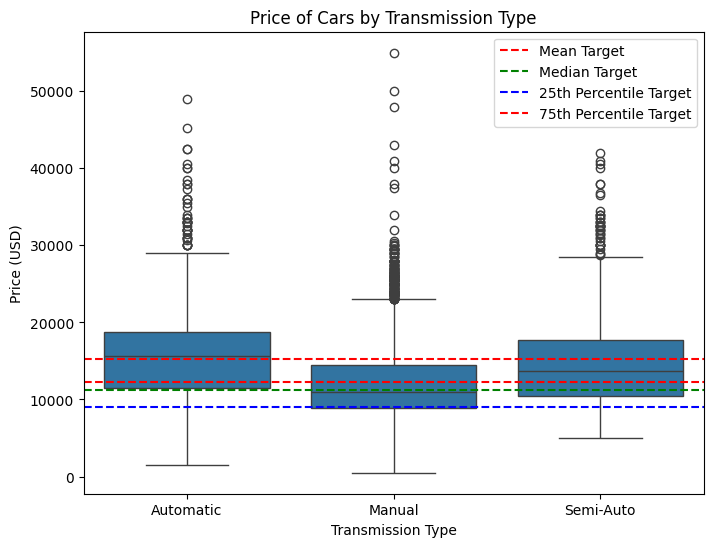

In [37]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="transmission", y="price", data=df)

# Add a horizontal line to indicate the mean of the target
plt.axhline(y=df["price"].mean(), color='r', linestyle='--', label='Mean Target')

# Add a vertical line to indicate the median of the target
plt.axhline(y=df["price"].median(), color='g', linestyle='--', label='Median Target')

# Add a vertical line to indicate the 25th percentile of the target
plt.axhline(y=df["price"].quantile(0.25), color='b', linestyle='--', label='25th Percentile Target')

# Add a vertical line to indicate the 75th percentile of the target
plt.axhline(y=df["price"].quantile(0.75), color='r', linestyle='--', label='75th Percentile Target')

# Set title and labels
plt.title('Price of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (USD)')
plt.legend()

# Show the plot
plt.show()

Correlation Coefficient: -0.35
P-Value: 0.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


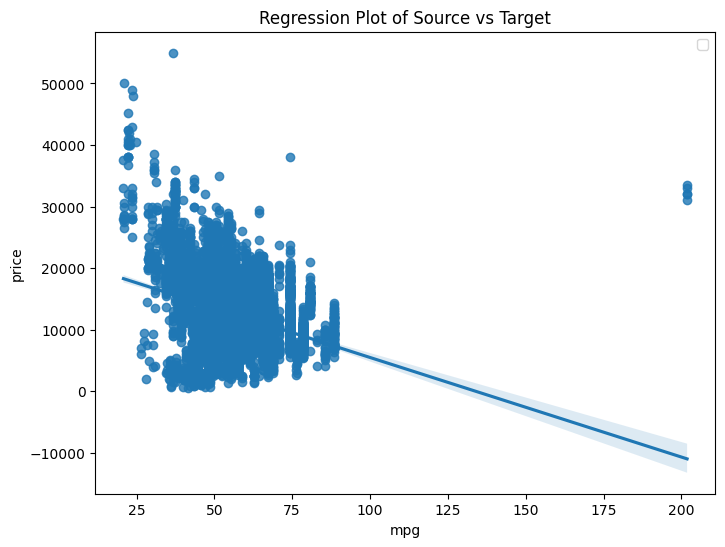

In [40]:
# Calculate the correlation coefficient and confidence interval
corr, p_value = pearsonr(df["mpg"], df["price"])

# Print the correlation coefficient and p-value
print(f"Correlation Coefficient: {corr:.2f}")
print(f"P-Value: {p_value:.2f}")

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x="mpg", y="price", data=df)

# Add a regression line
#plt.plot(df["mpg"], df["price"], color='r', linestyle='--', label='Regression Line')

# Add a regression line to indicate the 95% confidence interval
#z = np.polyfit(df["mpg"], df["price"], 1)
#p = np.poly1d(z)
#plt.plot(df["mpg"], p(df["mpg"]), color='g', linestyle='--', label='Best Fit Line')

# Add a regression line to indicate the 95% confidence interval
#z = np.polyfit(df["mpg"], df["price"], 1)
#p = np.poly1d(z)
#plt.plot(df["mpg"], p(df["mpg"]), color='b', linestyle='--', label='95% Confidence Interval')

# Set title and labels
plt.title('Regression Plot of Source vs Target')
plt.xlabel('mpg')
plt.ylabel('price')
plt.legend()

# Show the plot
plt.show()

In [53]:
#SLR
# Extract the source variable and target variable from the data frame
X = df[['mpg']]
y = df['price']
# Initialize a linear regression model
model = LinearRegression()
# Train the model using the source and target variables
model.fit(X, y)
# Make predictions using the trained model
y_pred = model.predict(X)
# Calculate the mean squared error (MSE)
mse_1 = mean_squared_error(y, y_pred)
# Calculate the coefficient of determination (R^2)
r2_1 = r2_score(y, y_pred)
# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse_1)
print("Coefficient of Determination (R^2):", r2_1)

Mean Squared Error (MSE): 19741690.809446193
Coefficient of Determination (R^2): 0.1198980224962416


In [54]:
#MLR
# Extract the source variables and target variable from the data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']
# Initialize a linear regression model
model = LinearRegression()
# Train the model using the source and target variables
model.fit(X, y)
# Make predictions using the trained model
y_pred = model.predict(X)
# Calculate the mean squared error (MSE)
mse_2 = mean_squared_error(y, y_pred)
# Calculate the coefficient of determination (R^2)
r2_2 = r2_score(y, y_pred)
# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse_2)
print("Coefficient of Determination (R^2):", r2_2)

Mean Squared Error (MSE): 6134065.2243147865
Coefficient of Determination (R^2): 0.7265379654576849


In [55]:
# Extract the source variables and target variable from the data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Create a pipeline that performs parameter scaling, polynomial feature generation, and linear regression
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)
# Train the model using the source and target variables
pipeline.fit(X, y)
# Make predictions using the trained model
y_pred = pipeline.predict(X)
# Calculate the mean squared error (MSE)
mse_3 = mean_squared_error(y, y_pred)
# Calculate the coefficient of determination (R^2)
r2_3 = r2_score(y, y_pred)
# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse_3)
print("Coefficient of Determination (R^2):", r2_3)

Mean Squared Error (MSE): 5234038.067379285
Coefficient of Determination (R^2): 0.7666619694384889


In [56]:
# Extract the source variables and target variable from the data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Ridge regression model
model = Ridge(alpha=0.1)

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)                                                    

# Calculate the mean squared error (MSE)
mse_4 = mean_squared_error(y_test, y_pred)
# Calculate the coefficient of determination (R^2)
r2_4 = r2_score(y_test, y_pred)
# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse_4)
print("Coefficient of Determination (R^2):", r2_4)

Mean Squared Error (MSE): 6051603.791008711
Coefficient of Determination (R^2): 0.7245485460755702


In [57]:
# Extract the source variables and target variable from the data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
# Transform the source variables into polynomial features on both the training data and testing data
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a Ridge regression model
model = Ridge(alpha=0.1)

# Fit the model
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)                                                    

# Calculate the mean squared error (MSE)
mse_5 = mean_squared_error(y_test, y_pred)
# Calculate the coefficient of determination (R^2)
r2_5 = r2_score(y_test, y_pred)
# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse_5)
print("Coefficient of Determination (R^2):", r2_5)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17106e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Mean Squared Error (MSE): 5171443.918627364
Coefficient of Determination (R^2): 0.7702852902542929


In [63]:
# Extract the source variables and target variable from the data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
# Transform the source variables into polynomial features on both the training data and testing data
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=4)

# Fit the model
grid_search.fit(X_train_poly, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("best_params :", best_params)

# Make predictions on the test set
y_pred = grid_search.predict(X_test_poly)                                                    

# Calculate the mean squared error (MSE)
mse_6 = mean_squared_error(y_test, y_pred)
# Calculate the coefficient of determination (R^2)
r2_6 = r2_score(y_test, y_pred)
# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse_6)
print("Coefficient of Determination (R^2):", r2_6)

print("Best Model :",grid_search.best_estimator_)
print("Accuracy :",grid_search.best_score_)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.19895e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.98408e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.00013e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.91476e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.19895e-24): res

best_params : {'alpha': 100}
Mean Squared Error (MSE): 5002035.486537107
Coefficient of Determination (R^2): 0.7800126944545319
Best Model : Ridge(alpha=100)
Accuracy : 0.7496856917327357


In [64]:
Report = {"Metrics":["MSE","R^2"],
          "Model_1": [mse_1,r2_1],
          "Model_2": [mse_2,r2_2], 
          "Model_3": [mse_3,r2_3],
          "Model_4": [mse_4,r2_4],
          "Model_5": [mse_5,r2_5],
          "Model_6": [mse_6,r2_6],}
pd.DataFrame(Report)

,Metrics,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6
0,MSE,1.974169e+07,6.134065e+06,5.234038e+06,6.051604e+06,5.171444e+06,5.002035e+06
1,R^2,1.198980e-01,7.265380e-01,7.666620e-01,7.245485e-01,7.702853e-01,7.800127e-01


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
